In [1]:
#Imports

import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns


# USE FILTER BELOW

In [2]:
df = pd.read_csv(r'C:\Users\Feele\Documents\Data\Sunderland\heatfilter.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,id,eventId,minute,second,teamId,x,y,expandedMinute,...,qualifiers/11/value,isGoal,cardType/value,cardType/displayName,qualifiers/13/value,qualifiers/14/value,qualifiers/15/type/value,qualifiers/15/type/displayName,qualifiers/15/value,number
0,9,11,2293067049,7,0,27.0,1974,40.3,17.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
1,23,25,2294109085,897,1,4.0,1974,15.3,32.3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
2,48,50,2293067697,24,1,59.0,1974,39.9,34.6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
3,60,62,2293067865,31,2,16.0,1974,52.2,42.1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
4,62,64,2293067913,33,2,24.0,1974,48.6,62.3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0


In [4]:
#subsets

#half     df = df[df['period/value']==1] 
#minute   df = df[df['minute']<=45]                               
#minute2  df = df[(df['minute'] >=64 ) & (df['minute'] <81)]      
#player   df = df[df['name']== 'Winchester']
#playerId df = df[df['name']== 'Winchester']
#team     df = df[df['teamId']==16]  


df = df[df['name']== 'Winchester']
df = df[df['period/value']==1] 

KeyError: 'name'

In [ ]:
# Inflating X and Y to pitchsize

df['x'] = df['x']*1.2
df['endX'] = df['endX']*1.2
df['y'] = df['y']*.8
df['endY'] = df['endY']*.8

### Colour chat for heat map 

https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

C:\Users\Feele\Documents\Analytics\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


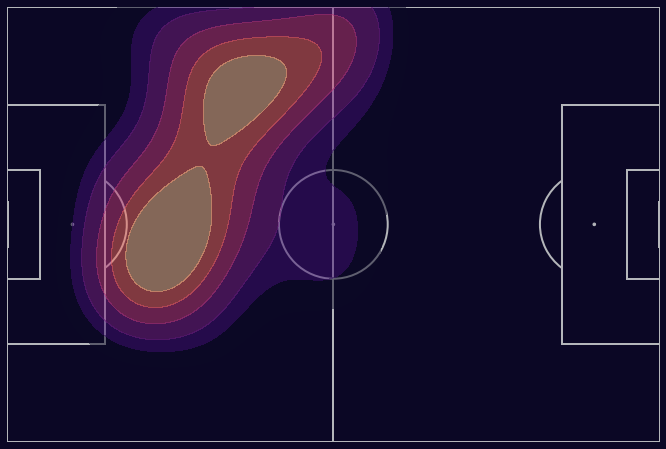

In [5]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#0B0725')
ax.patch.set_facecolor('#0B0725')

#pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#0B0725', line_color='#B4B6BA', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

##### HEAT MAP ADDITION ####

kde = sns.kdeplot(
        df['x'],
        df['y'],
        shade =True,
        thresh=.3,
        alpha=.5,
        n_levels=7,
        cmap = 'magma',
        #cbar = 'True'
)
#Limited Heat Map to edges
plt.xlim(0,120)
plt.ylim(0,80) 

plt.savefig('test.png',dpi=500,bbox_inches = 'tight') 